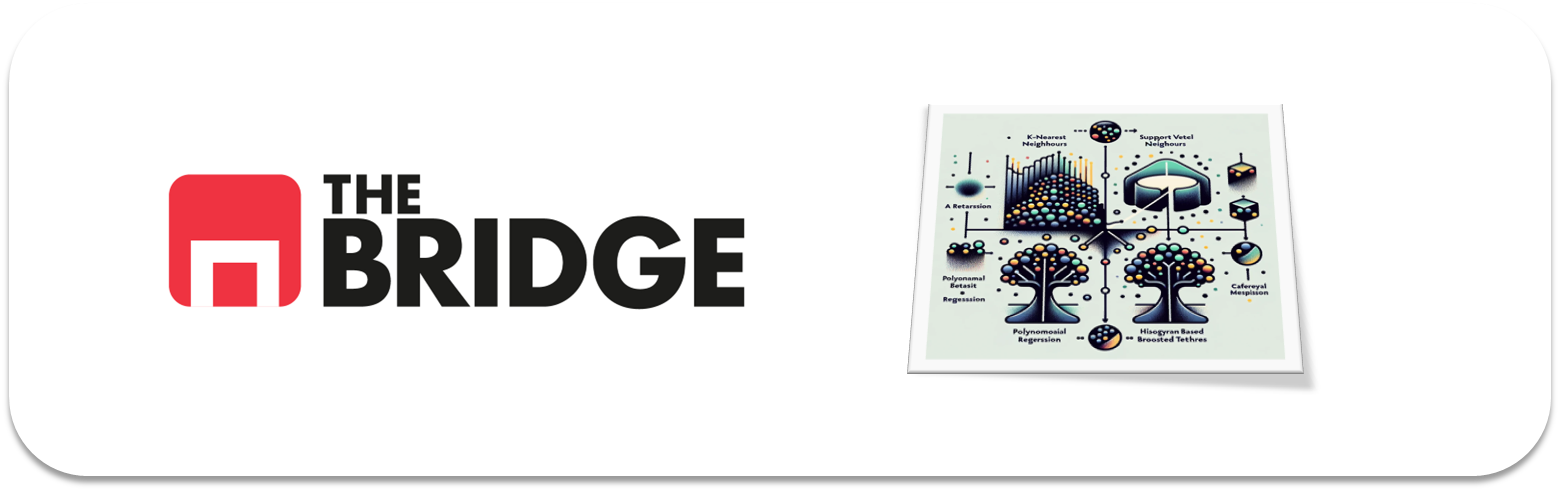

* La práctica consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [95]:
import pandas as pd
import traceback
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error # regresion
from sklearn.metrics import balanced_accuracy_score #Clasficación
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

#Regresion
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import  RandomForestRegressor,  VotingRegressor
from sklearn.linear_model import LogisticRegression

#Clasificacion
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, \
accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df = pd.read_csv('./datasets/wines_dataset.csv', sep = '|')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,white
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,white
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
class                    object
dtype: object

In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

In [7]:
df.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN


## Funciones

In [8]:
def cardinalidad(data):
        '''Funcion para saber la cardinalidad de las varibales que tenemos en el data frame'''
        try:
            df_cardin = pd.DataFrame([{
                        'variable' : i,
                        'tipo_dato' : data[i].dtypes,
                        'cantidad_de_nulos' : data[i].isna().sum(),
                        'valores_unicos' : data[i].unique(),
                        'cardinalidad' : data[i].nunique(),
                        'porcentaje_cardinalidad' : (data[i].nunique()/data.shape[0])*100
                    } for i in data])
            
        except Exception as a:
            traceback.print_exc()
            print(f"No se pudo procesar el DataFrame por  {a}")

        return df_cardin

In [9]:
def graficos_variables_cualit(data):
    try:
        for columna in data.columns:
            print('--'*50)
            print(f"VARIABLE: {columna}\n")
            if len(data[columna].dropna().unique()) > 1:
                ax = sns.countplot(data= data.sort_values(by=columna), x= columna, palette='husl')
                ax.set_xticklabels(data[columna].sort_values().unique(), rotation=90)
                plt.title(f"Conteo variable {columna}")
                plt.show();
            else:
                print('No es necesario graficar porque tiene un solo valor dentro de la columna')
            print(data[columna].value_counts())
            print('--'*50)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

In [10]:
def graficos_variables_cuant(data):
    ''''Funcuion para graficar las variables cuantitativas'''
    media_color = 'r'
    mediana_color = 'b'
    try:
        for columna in data.columns:
            print('--'*30)
            print(f"VARIABLE: {columna}\n")

            media = data[columna].mean()
            mediana = data[columna].median()

            plt.figure(figsize=(20,4))
            sns.boxplot(data[columna], orient='h')
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1)
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1)

            plt.show()

            sns.displot(data[columna], rug = True, bins = 50)
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1, label = f'Media: {media:.0f}')
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1, label = f'Mediana: {mediana:.0f}')

            plt.title(f'Distribución de {columna}')
            plt.legend()

            plt.show()

            print(data[columna].describe().round())
            print('--'*30)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

In [11]:
def grafico_variable_ppal(data, columna:str):
        ''' 
        Funcion para graficar la variable principal a analizar
        input : df
        output: grafico

        '''
        try:
            media_color = 'r'
            mediana_color = 'b'
            media = data[columna].mean()
            median = data[columna].median()

            sns.kdeplot(data=data, x=columna,fill=True,palette='hls')
            # Agregar líneas verticales para las estadísticas
            plt.axvline(media, color=media_color, linestyle='dashed', label=f'Media: {media:.2f}')
            plt.axvline(median, color= mediana_color, linestyle='dashed', label=f'Median: {median:.2f}')

            plt.title(f'Distribución de {columna}')

            plt.legend()

            plt.show()
        except Exception as a:
            traceback.print_exc()
            print(f"No pude analizar la variable por {a}")

In [12]:
def grafico_heatmap(data):
        '''Función para graficar en un mapa de calor mostrando las correlaciones entre las variables'''
        try:
            df_cuant = data.select_dtypes(include = 'number')
            plt.figure(figsize=(10,10))
            sns.heatmap(df_cuant.corr(numeric_only=True), robust=True, 
                        square = True, linewidths = .3, annot=True)      
        except Exception as a:
            print(f"No pude hacer el gráfico por {a}")

# EDA

In [13]:
cardinalidad(df)

,variable,tipo_dato,cantidad_de_nulos,valores_unicos,cardinalidad,porcentaje_cardinalidad
0,fixed acidity,float64,0,"[8.5, 8.3, 6.8, 6.1, 7.5, 5.7, 6.6, 6.7, 8.9, ...",106,1.631522
1,volatile acidity,float64,0,"[0.21, 0.16, 0.18, 0.26, 0.63, 0.265, 0.31, 0....",187,2.878252
2,citric acid,float64,0,"[0.26, 0.37, 0.38, 0.25, 0.27, 0.28, 0.31, 0.3...",89,1.369863
3,residual sugar,float64,0,"[9.25, 7.9, 1.4, 2.9, 2.0, 6.9, 11.4, 2.1, 2.5...",316,4.863783
4,chlorides,float64,0,"[0.034, 0.025, 0.038, 0.047, 0.083, 0.036, 0.0...",214,3.293828
5,free sulfur dioxide,float64,0,"[73.0, 38.0, 35.0, 289.0, 17.0, 46.0, 18.0, 9....",135,2.077882
6,total sulfur dioxide,float64,0,"[142.0, 107.0, 111.0, 440.0, 91.0, 150.0, 165....",276,4.248115
7,density,float64,0,"[0.9945, 0.99306, 0.9918, 0.99314, 0.99616, 0....",998,15.360936
8,pH,float64,0,"[3.05, 2.93, 3.32, 3.44, 3.26, 3.36, 3.41, 3.3...",108,1.662306
9,sulphates,float64,0,"[0.37, 0.59, 0.64, 0.58, 0.44, 0.63, 0.4, 0.51...",111,1.708481


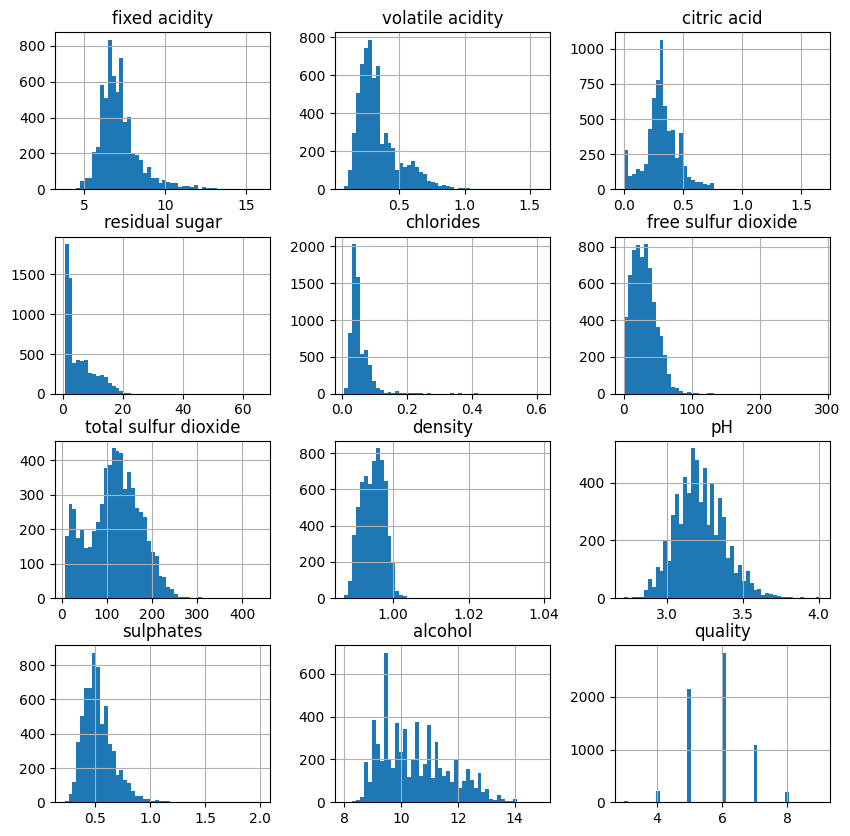

In [14]:
df.hist(bins=50, figsize=(10,10))
plt.show()

In [15]:
df[(df['residual sugar'] > 45) | (df['residual sugar'] < 1)]['residual sugar'].unique()

array([ 0.9 ,  0.8 ,  0.7 ,  0.6 ,  0.95, 65.8 ])

In [16]:
df[df['residual sugar'] > 45]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
4734,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,white


In [17]:
df[df['residual sugar'] < 1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
160,8.1,0.200,0.28,0.9,0.023,49.0,87.0,0.99062,2.92,0.36,11.1,6,white
182,7.0,0.140,0.41,0.9,0.037,22.0,95.0,0.99140,3.25,0.43,10.9,6,white
325,7.1,0.530,0.24,0.8,0.029,29.0,86.0,0.99300,3.16,0.32,9.1,4,white
396,5.8,0.150,0.28,0.8,0.037,43.0,127.0,0.99198,3.24,0.51,9.3,5,white
542,8.5,0.220,0.34,0.7,0.040,5.0,25.0,0.99180,3.04,0.37,10.5,4,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6328,6.0,0.210,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white
6333,5.3,0.230,0.56,0.9,0.041,46.0,141.0,0.99119,3.16,0.62,9.7,5,white
6374,9.2,0.350,0.39,0.9,0.042,15.0,61.0,0.99240,2.96,0.28,10.4,4,white
6380,5.6,0.175,0.29,0.8,0.043,20.0,67.0,0.99112,3.28,0.48,9.9,6,white


------------------------------------------------------------
VARIABLE: fixed acidity



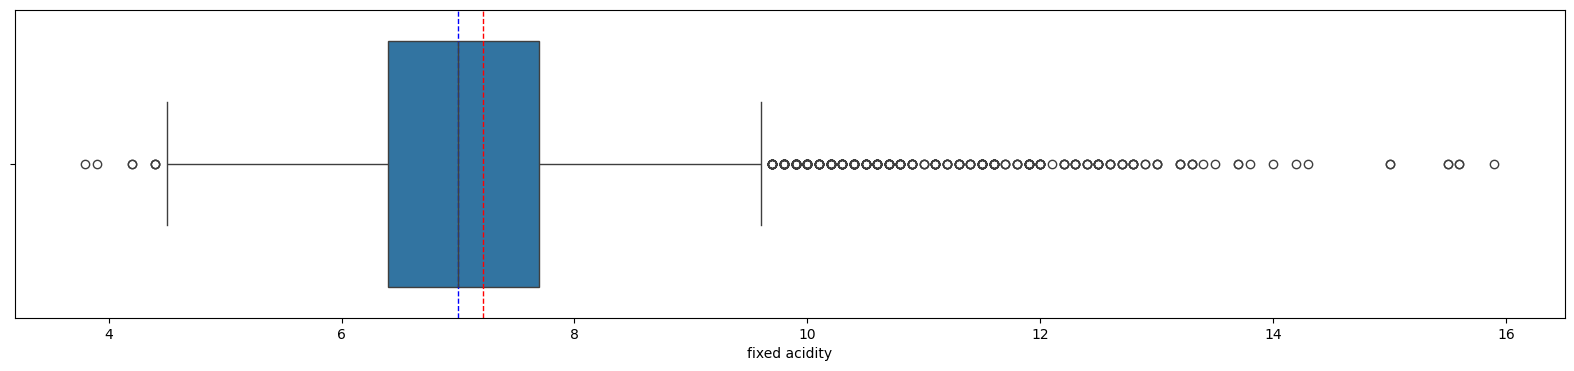

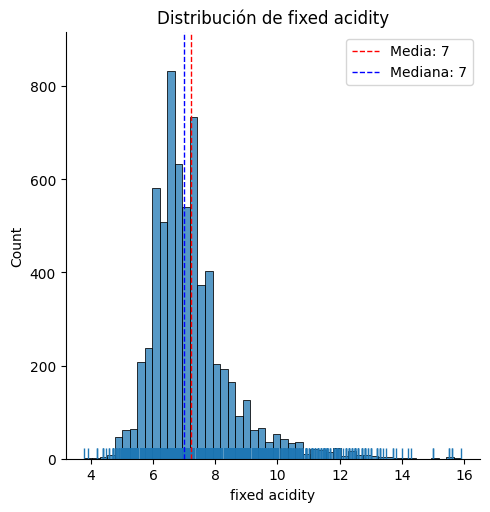

count    6497.0
mean        7.0
std         1.0
min         4.0
25%         6.0
50%         7.0
75%         8.0
max        16.0
Name: fixed acidity, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: volatile acidity



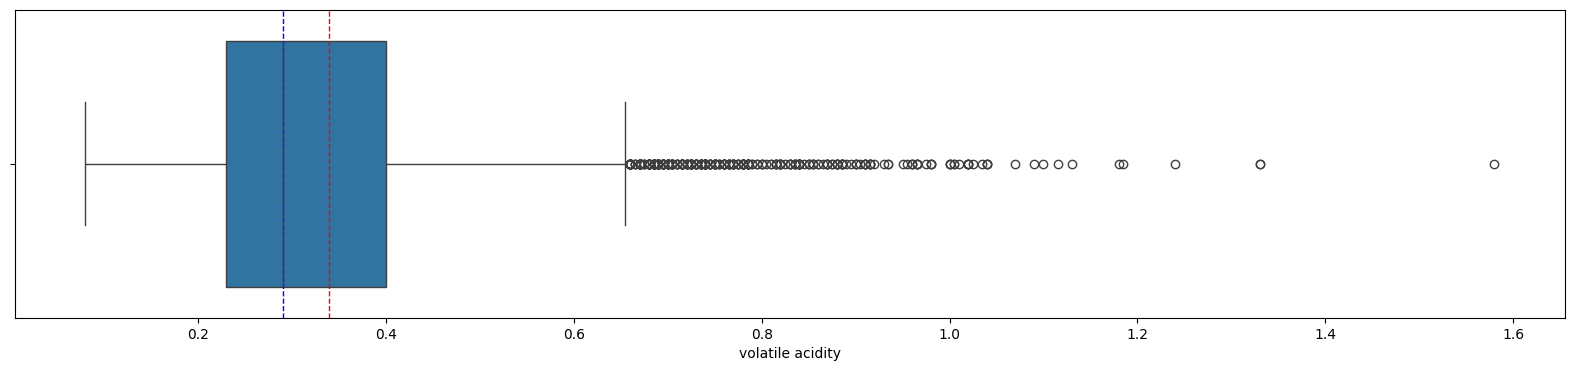

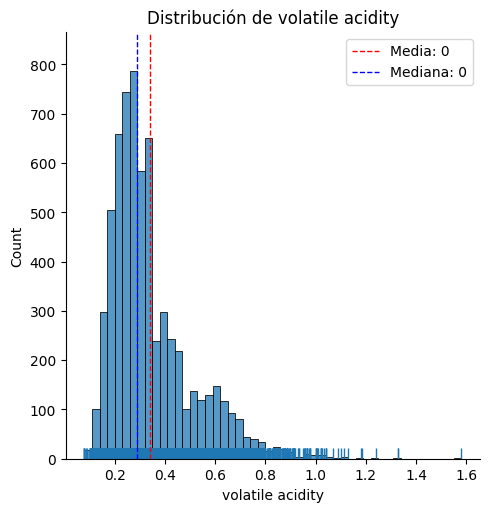

count    6497.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         2.0
Name: volatile acidity, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: citric acid



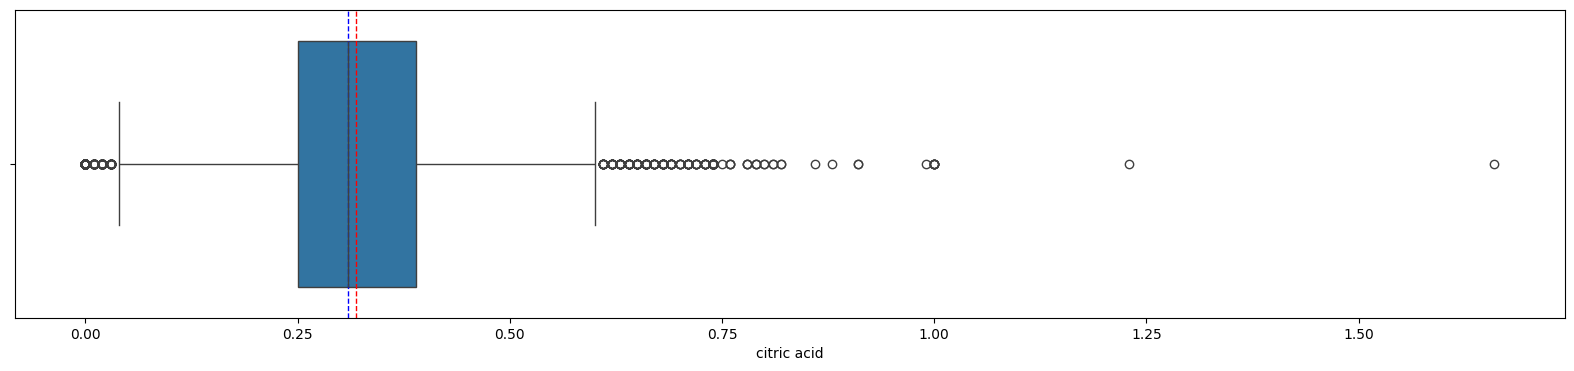

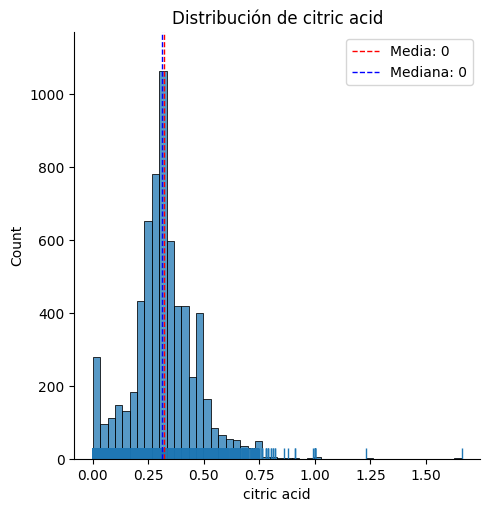

count    6497.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         2.0
Name: citric acid, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: residual sugar



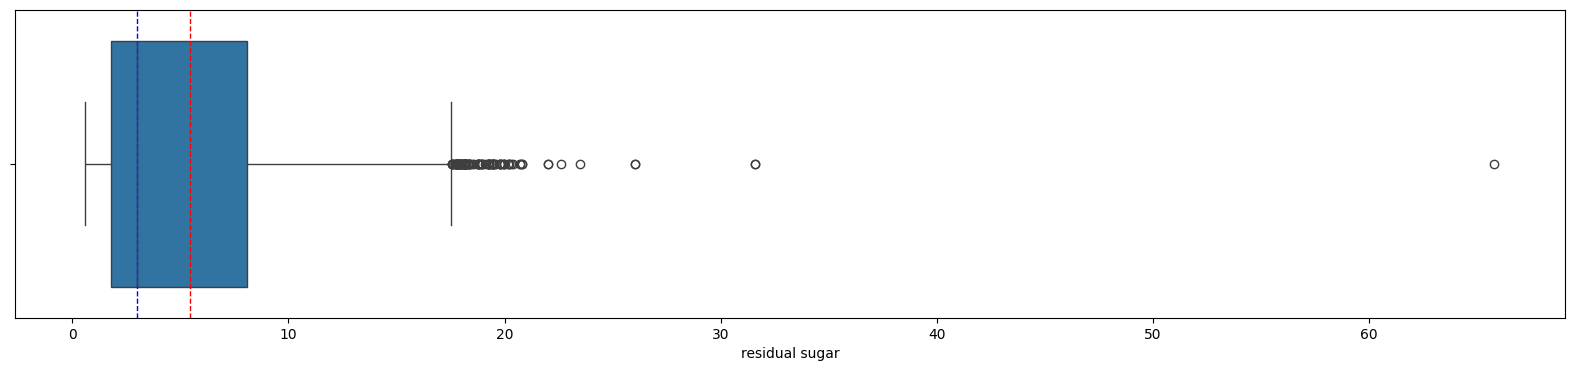

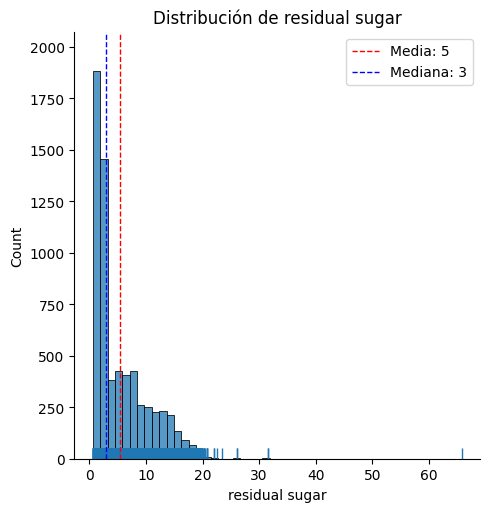

count    6497.0
mean        5.0
std         5.0
min         1.0
25%         2.0
50%         3.0
75%         8.0
max        66.0
Name: residual sugar, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: chlorides



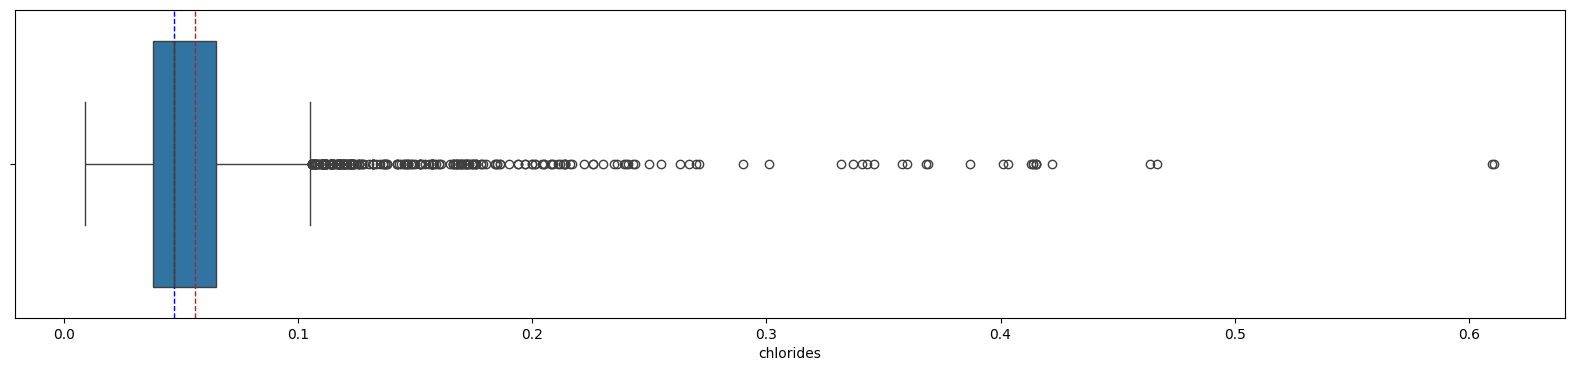

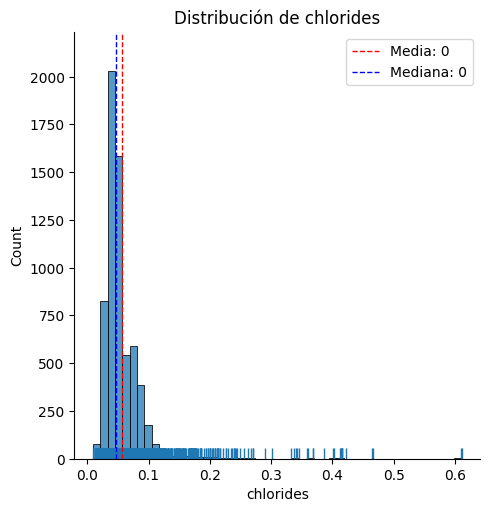

count    6497.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         1.0
Name: chlorides, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: free sulfur dioxide



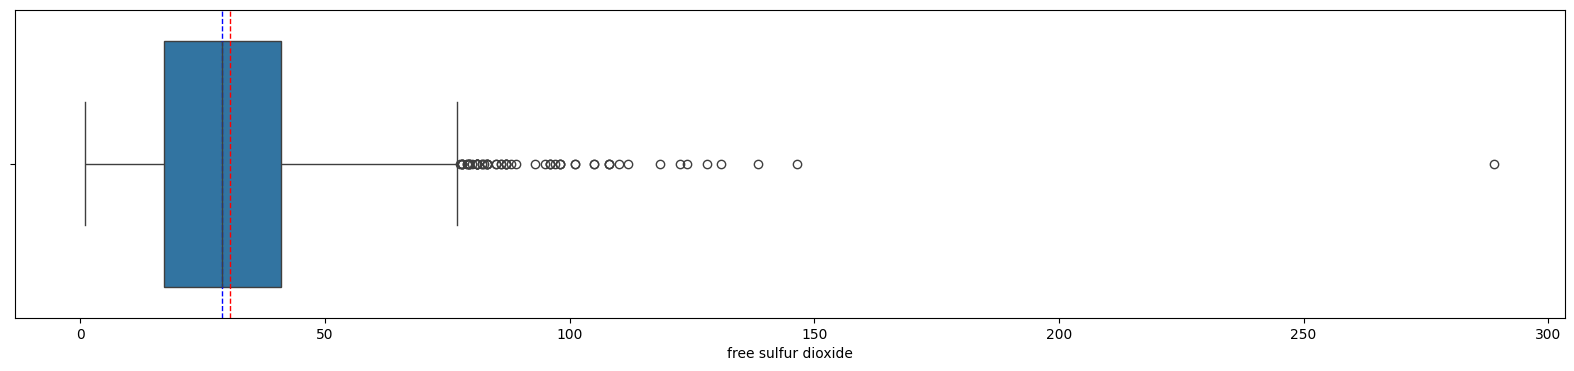

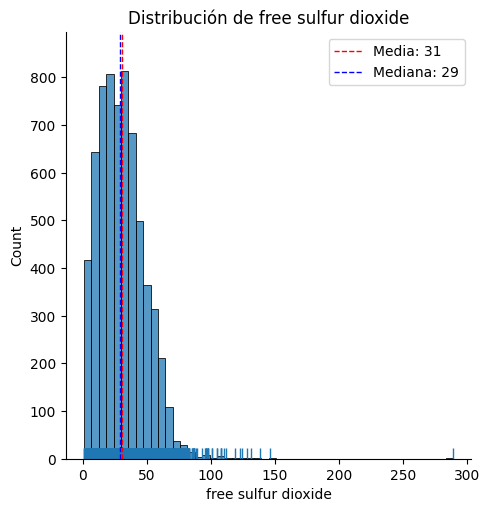

count    6497.0
mean       31.0
std        18.0
min         1.0
25%        17.0
50%        29.0
75%        41.0
max       289.0
Name: free sulfur dioxide, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: total sulfur dioxide



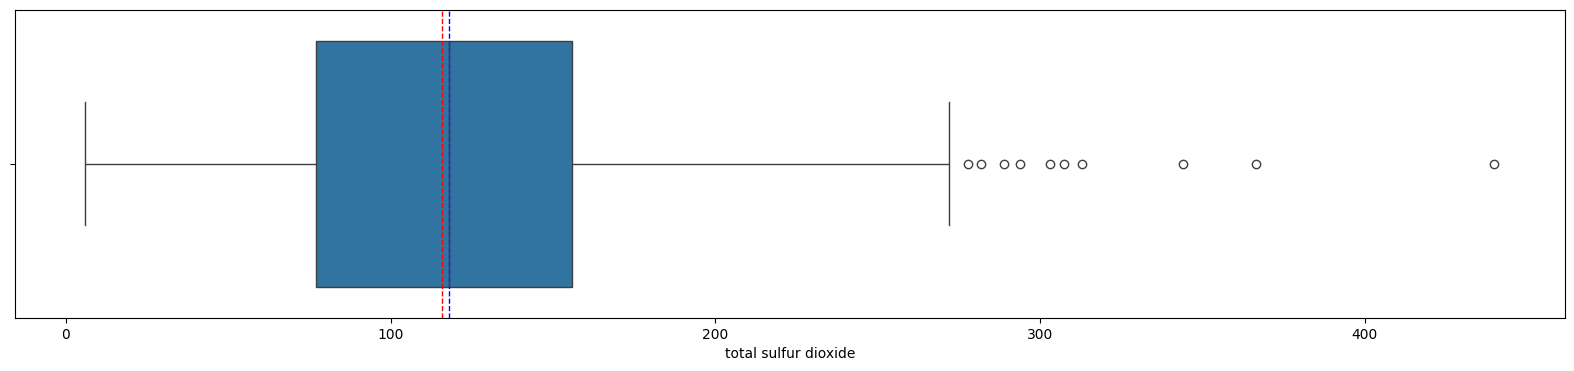

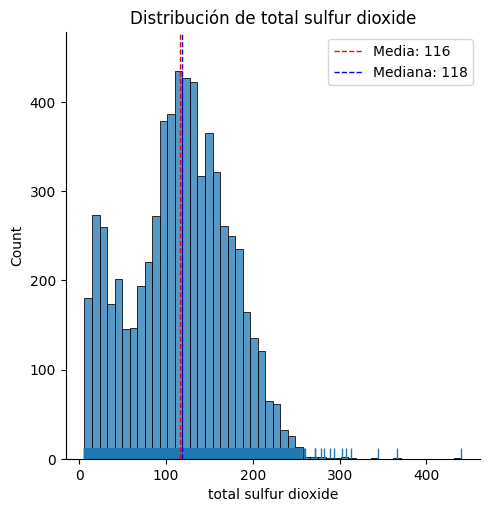

count    6497.0
mean      116.0
std        57.0
min         6.0
25%        77.0
50%       118.0
75%       156.0
max       440.0
Name: total sulfur dioxide, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: density



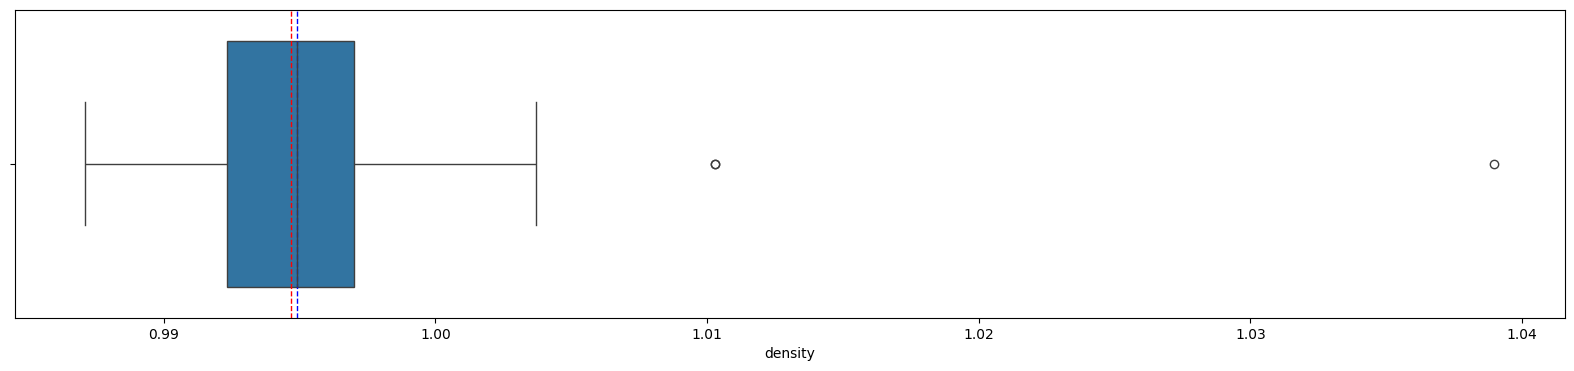

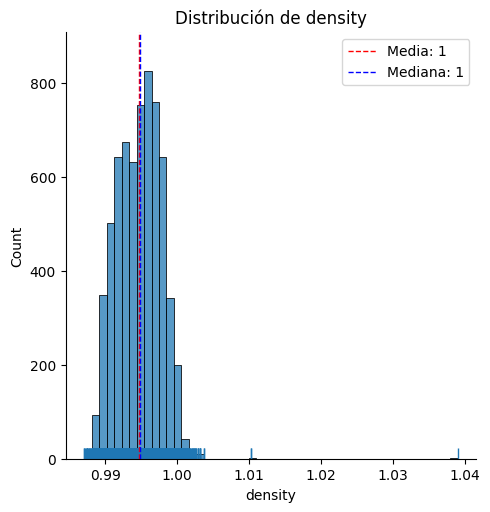

count    6497.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: density, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: pH



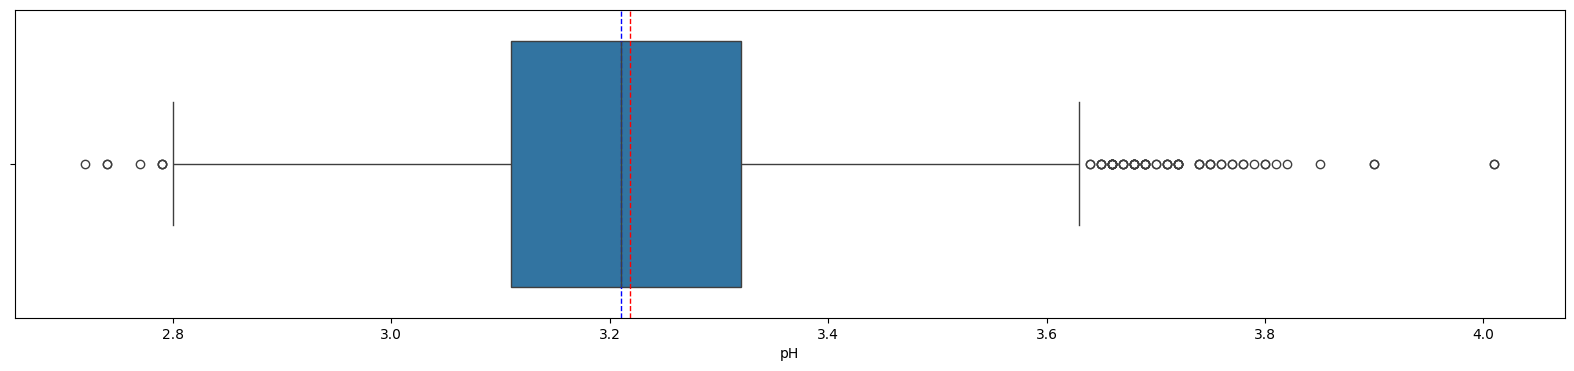

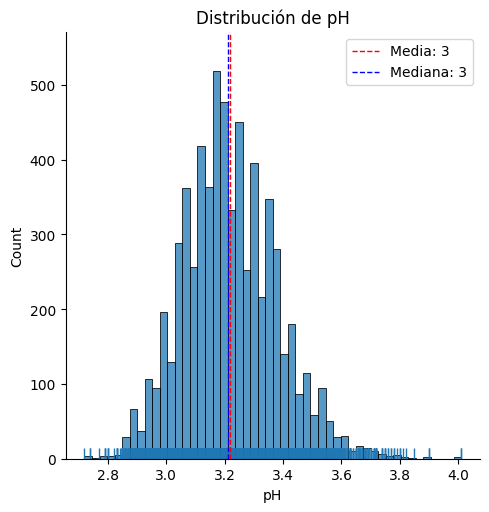

count    6497.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         4.0
Name: pH, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: sulphates



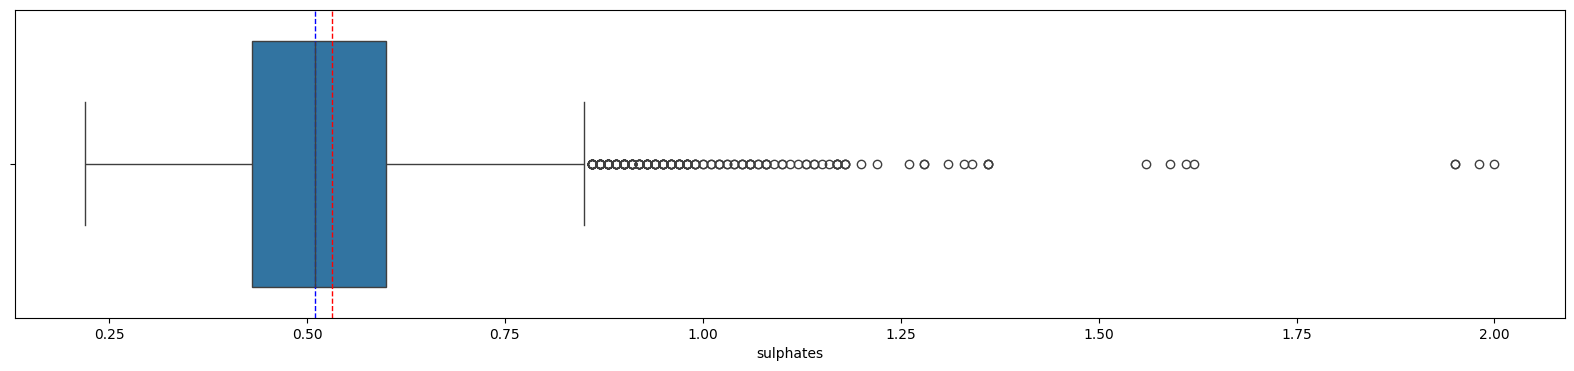

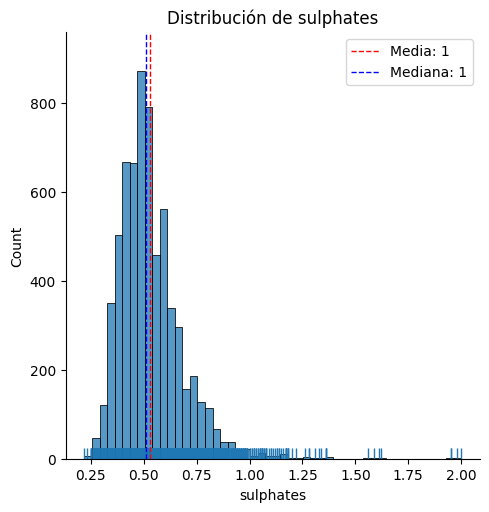

count    6497.0
mean        1.0
std         0.0
min         0.0
25%         0.0
50%         1.0
75%         1.0
max         2.0
Name: sulphates, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: alcohol



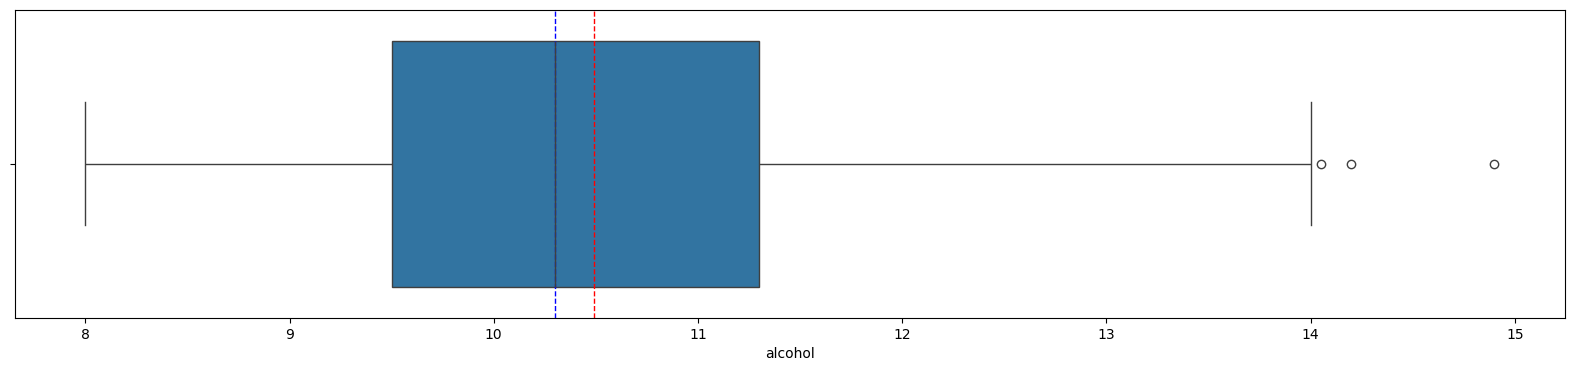

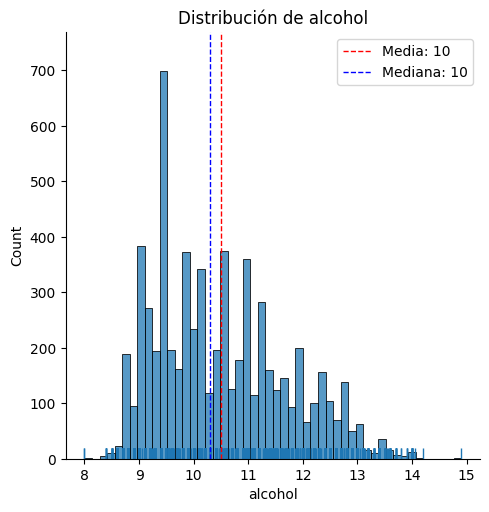

count    6497.0
mean       10.0
std         1.0
min         8.0
25%        10.0
50%        10.0
75%        11.0
max        15.0
Name: alcohol, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: quality



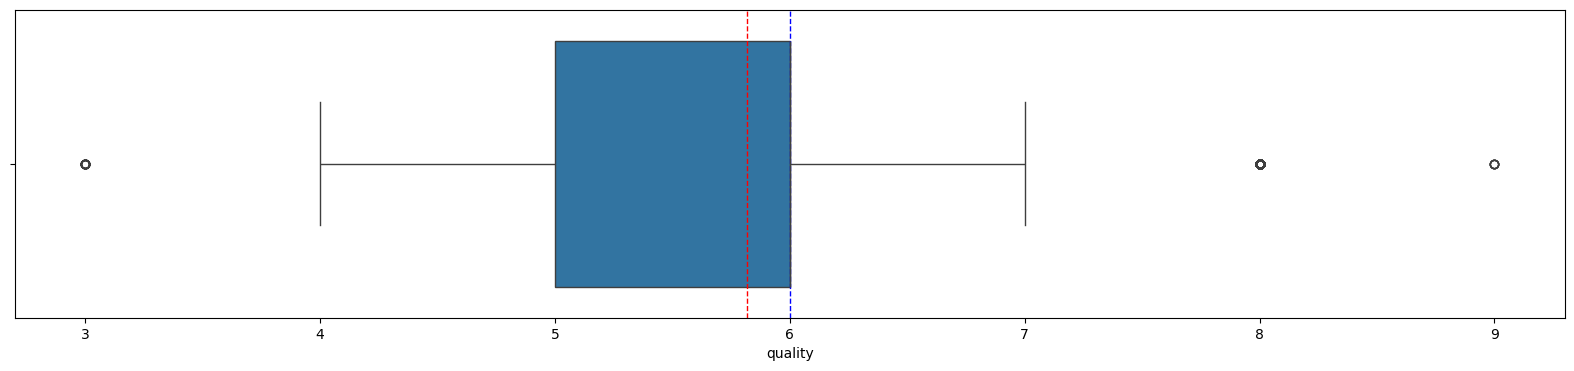

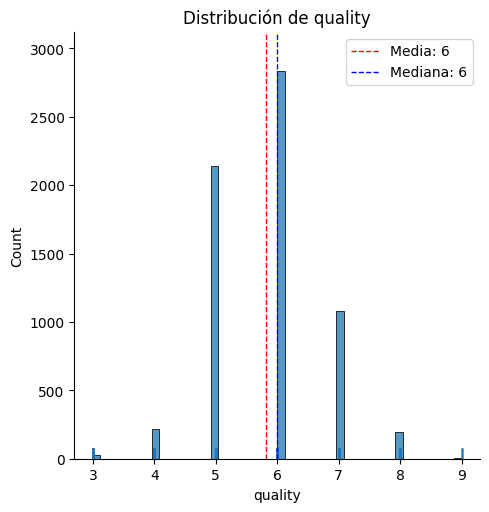

count    6497.0
mean        6.0
std         1.0
min         3.0
25%         5.0
50%         6.0
75%         6.0
max         9.0
Name: quality, dtype: float64
------------------------------------------------------------


In [18]:
graficos_variables_cuant(df.select_dtypes(exclude= object))

----------------------------------------------------------------------------------------------------
VARIABLE: class



C:\Users\ortiz\AppData\Local\Temp\ipykernel_16504\1271410114.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= data.sort_values(by=columna), x= columna, palette='husl')
C:\Users\ortiz\AppData\Local\Temp\ipykernel_16504\1271410114.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data[columna].sort_values().unique(), rotation=90)


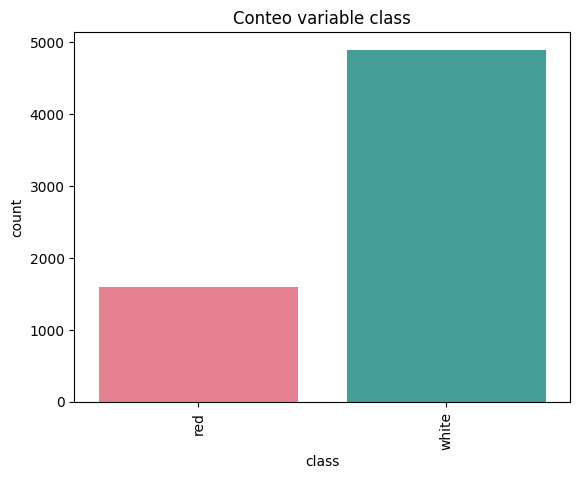

class
white    4898
red      1599
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


In [19]:
graficos_variables_cualit(df.select_dtypes(include=object))

Variable principal para regresión

C:\Users\ortiz\AppData\Local\Temp\ipykernel_16504\3915104708.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data, x=columna,fill=True,palette='hls')


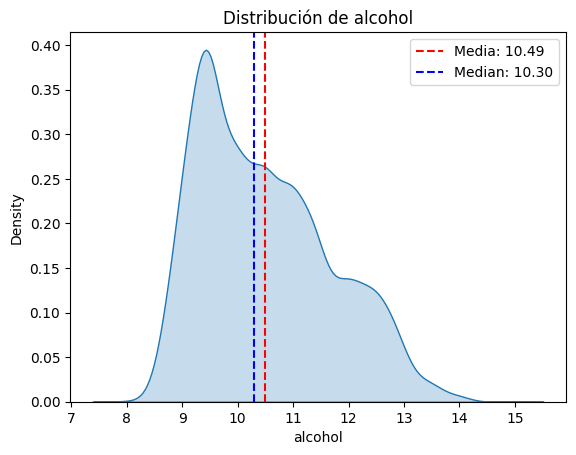

In [20]:
grafico_variable_ppal(df, 'alcohol')

C:\Users\ortiz\AppData\Local\Temp\ipykernel_16504\3915104708.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data, x=columna,fill=True,palette='hls')


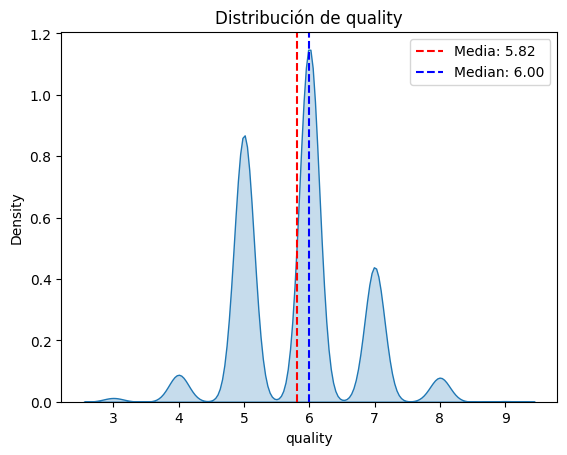

In [21]:
grafico_variable_ppal(df, 'quality')

<Axes: xlabel='quality', ylabel='count'>

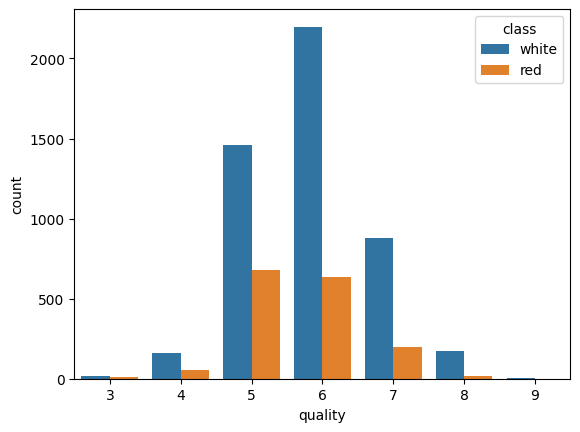

In [22]:
sns.countplot(df, x= 'quality', hue = 'class')

In [23]:
df.select_dtypes(exclude=object).corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


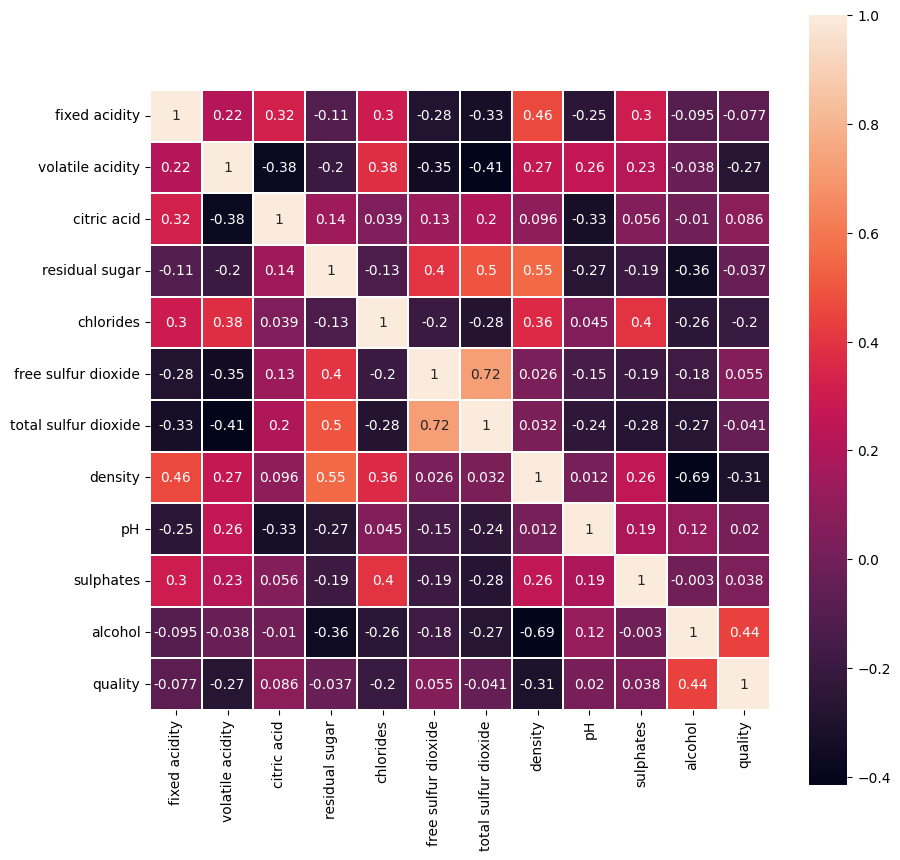

In [24]:
grafico_heatmap(df)

# Clasificación

In [25]:
X = df.drop(columns='quality', axis = 1)
y = df['quality']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## One hot encoder

Train

In [27]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded = enc.fit_transform(X_train[['class']])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(['class']))

X_train.reset_index(inplace=True, drop=True)
X_train_encoded = pd.concat([X_train, encoded_df], axis=1)
X_train_encoded.drop(['class'], axis=1, inplace=True)

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
X_train_encoded.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class_red,class_white
0,7.9,0.18,0.40,2.2,0.049,38.0,67.0,0.99600,3.33,0.93,11.3,1.0,0.0
1,7.1,0.18,0.74,15.6,0.044,44.0,176.0,0.99960,3.38,0.67,9.0,0.0,1.0
2,7.6,0.51,0.24,1.2,0.040,10.0,104.0,0.99200,3.05,0.29,10.8,0.0,1.0
3,6.0,0.25,0.28,7.7,0.053,37.0,132.0,0.99489,3.06,0.50,9.4,0.0,1.0
4,9.0,0.38,0.41,2.4,0.103,6.0,10.0,0.99604,3.13,0.58,11.9,1.0,0.0


Test

In [29]:
encoded = enc.transform(X_test[['class']])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(['class']))

X_test.reset_index(inplace=True, drop=True)
X_test_encoded = pd.concat([X_test, encoded_df], axis=1)
X_test_encoded.drop(['class'], axis=1, inplace=True)

In [30]:
X_test_encoded.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class_red,class_white
0,7.4,0.32,0.27,1.4,0.049,38.0,173.0,0.99335,3.03,0.52,9.3,0.0,1.0
1,6.6,0.34,0.24,3.3,0.034,29.0,99.0,0.99031,3.10,0.40,12.3,0.0,1.0
2,6.4,0.32,0.35,4.8,0.030,34.0,101.0,0.99120,3.36,0.60,12.5,0.0,1.0
3,6.8,0.23,0.32,1.6,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,0.0,1.0
4,6.7,0.34,0.26,1.9,0.038,58.0,138.0,0.98930,3.00,0.47,12.2,0.0,1.0


## Escalado

Train

In [31]:
sc = StandardScaler()

X_train_encoded_t = X_train_encoded[['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol', 'pH']]
train_t_array = sc.fit_transform(X_train_encoded_t)
train_t = pd.DataFrame(train_t_array, columns=X_train_encoded_t.columns)

train_resto = X_train_encoded.drop(columns=['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol', 'pH'], axis = 1)

X_train_et = pd.concat([train_t, train_resto], axis=1)

X_train_et


,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol,pH,volatile acidity,citric acid,chlorides,density,sulphates,class_red,class_white
0,0.530566,-0.682946,0.413075,-0.855503,0.678033,0.692811,0.18,0.40,0.049,0.99600,0.93,1.0,0.0
1,-0.087744,2.118572,0.746349,1.063516,-1.248291,1.005292,0.18,0.74,0.044,0.99960,0.67,0.0,1.0
2,0.298700,-0.892015,-1.142201,-0.204093,0.259267,-1.057086,0.51,0.24,0.040,0.99200,0.29,0.0,1.0
3,-0.937920,0.466930,0.357530,0.288866,-0.913278,-0.994590,0.25,0.28,0.053,0.99489,0.50,0.0,1.0
4,1.380743,-0.641133,-1.364383,-1.859027,1.180553,-0.557116,0.38,0.41,0.103,0.99604,0.58,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,-0.628765,1.282298,1.635078,1.679715,-0.997031,-0.244634,0.24,0.50,0.047,0.99660,0.57,0.0,1.0
5193,-0.474187,1.376378,-0.309017,0.165626,-0.913278,1.442767,0.22,0.28,0.058,0.99856,0.45,0.0,1.0
5194,-0.474187,0.508744,-0.031289,0.517740,0.426774,0.630314,0.20,0.38,0.052,0.99470,0.56,0.0,1.0
5195,0.066834,-0.766574,-0.253471,-0.732264,2.101838,-1.619553,0.41,0.29,0.032,0.98889,0.35,0.0,1.0


Test

In [32]:
X_test_encoded_t = X_test_encoded[['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol', 'pH']]
test_t_array = sc.transform(X_test_encoded_t)
test_t = pd.DataFrame(test_t_array, columns=X_test_encoded_t.columns)

test_resto = X_test_encoded.drop(columns=['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol', 'pH'], axis = 1)

X_test_et = pd.concat([test_t, test_resto], axis=1)

X_test_et

,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol,pH,volatile acidity,citric acid,chlorides,density,sulphates,class_red,class_white
0,0.144123,-0.850201,0.413075,1.010699,-0.997031,-1.182079,0.320,0.27,0.049,0.99335,0.52,0.0,1.0
1,-0.474187,-0.452971,-0.086835,-0.292122,1.515566,-0.744604,0.340,0.24,0.034,0.99031,0.40,0.0,1.0
2,-0.628765,-0.139368,0.190893,-0.256910,1.683072,0.880300,0.320,0.35,0.030,0.99120,0.60,0.0,1.0
3,-0.319610,-0.808388,0.690803,0.552951,1.683072,0.442826,0.230,0.32,0.026,0.99040,0.54,0.0,1.0
4,-0.396899,-0.745667,1.523987,0.394500,1.431812,-1.369568,0.340,0.26,0.038,0.98930,0.47,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0.298700,1.909503,0.079802,1.503658,-1.080785,-1.369568,0.285,0.32,0.063,0.99800,0.45,0.0,1.0
1296,3.390250,-0.808388,0.301984,-1.137194,-0.494512,1.005292,0.470,0.44,0.147,0.99836,0.86,1.0,0.0
1297,2.308207,-0.703853,-1.419929,-1.876633,1.348059,-0.119641,0.340,0.48,0.052,0.99458,0.69,1.0,0.0
1298,-0.783342,-0.808388,-1.308837,-1.841422,0.761786,2.442708,0.460,0.17,0.073,0.99425,0.54,1.0,0.0


## Modelos

In [83]:
model_0 = SVC(random_state=40)
model_1 = LogisticRegression(random_state=40, class_weight='balanced', 
                             penalty= 'l1',
                              solver= 'saga' )
model_2 = RandomForestClassifier(class_weight='balanced', random_state=40)
model_3 = XGBClassifier(random_state=40)
model_4 = CatBoostClassifier(verbose=False, random_state=40)

In [34]:
smote = SMOTE(random_state = 40, k_neighbors=4)
X_train_ets, y_train_ets = smote.fit_resample(X_train_et, y_train)

In [35]:
y_test_adj = y_test - 3
y_train_adj = y_train_ets - 3

In [36]:
models = [model_0, model_1, model_2, model_3, model_4]

In [93]:
dicc = {}
for i in models:
    scores = cross_val_score(i, X_train_ets, y_train_adj, cv=10, scoring='balanced_accuracy')
    media = scores.mean()
    estandar = scores.std()
    clave = f"{i}- 'balanced_accuracy' "

    dicc[clave] = media

df_scores = pd.DataFrame([dicc]).T.sort_values(by=0, ascending=False)
df_scores

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

,0
"RandomForestClassifier(class_weight='balanced', random_state=40)- 'balanced_accuracy'",0.904336
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=40, ...)- 'balanced_accuracy'",0.889317
<catboost.core.CatBoostClassifier object at 0x0000022C499A9610>- 'balanced_accuracy',0.881968
SVC(random_state=40)- 'balanced_accuracy',0.696701
"LogisticRegression(class_weight='balanced', random_state=40)- 'balanced_accuracy'",0.511195


In [94]:
df_scores

,0
"RandomForestClassifier(class_weight='balanced', random_state=40)- 'balanced_accuracy'",0.904336
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=40, ...)- 'balanced_accuracy'",0.889317
<catboost.core.CatBoostClassifier object at 0x0000022C499A9610>- 'balanced_accuracy',0.881968
SVC(random_state=40)- 'balanced_accuracy',0.696701
"LogisticRegression(class_weight='balanced', random_state=40)- 'balanced_accuracy'",0.511195


Aplicamos Grid search para mejorar con hiperparametros

In [ ]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(model_2,
#                            param_grid,
#                            cv=5,
#                            scoring='balanced_accuracy',
#                            n_jobs=-1
#                           )

# grid_search.fit(X_train_ets, y_train_adj)

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
765 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=40),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='balanced_accuracy')

In [ ]:
# grid_search.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [38]:
modelo = RandomForestClassifier(class_weight='balanced', 
                                random_state=40,
                                bootstrap=False,
                                max_depth=2,
                                min_samples_leaf=2,
                                min_samples_split=2,
                                n_estimators=100)

In [39]:
modelo.fit(X_train_ets, y_train_adj)
y_pred = modelo.predict(X_train_ets)
print(f"Modelo {modelo} : {balanced_accuracy_score(y_train_adj, y_pred)}")
print(classification_report(y_train_adj, y_pred))

Modelo RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=2,
                       min_samples_leaf=2, random_state=40) : 0.42197512250282704
              precision    recall  f1-score   support

           0       0.45      0.53      0.48      2274
           1       0.48      0.35      0.41      2274
           2       0.30      0.57      0.39      2274
           3       0.15      0.01      0.02      2274
           4       0.29      0.08      0.13      2274
           5       0.42      0.41      0.41      2274
           6       0.55      1.00      0.71      2274

    accuracy                           0.42     15918
   macro avg       0.38      0.42      0.36     15918
weighted avg       0.38      0.42      0.36     15918



In [40]:
y_pred = modelo.predict(X_test_et)
print(f"Modelo {modelo} : {balanced_accuracy_score(y_test_adj, y_pred)}")
print(classification_report(y_test_adj, y_pred))

Modelo RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=2,
                       min_samples_leaf=2, random_state=40) : 0.2526918213175846
              precision    recall  f1-score   support

           0       0.01      0.33      0.02         6
           1       0.09      0.28      0.13        43
           2       0.40      0.52      0.45       432
           3       0.45      0.02      0.03       562
           4       0.27      0.05      0.09       210
           5       0.07      0.32      0.11        47
           6       0.00      0.00      0.00         0

    accuracy                           0.21      1300
   macro avg       0.18      0.22      0.12      1300
weighted avg       0.38      0.21      0.19      1300



c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification

Por lo que vemos en el mapa de confusión a pesar de entrenar con las clases balanceadas igual sigue sin generalizar bien lo que esta clasificado con menor cantidad de muestras

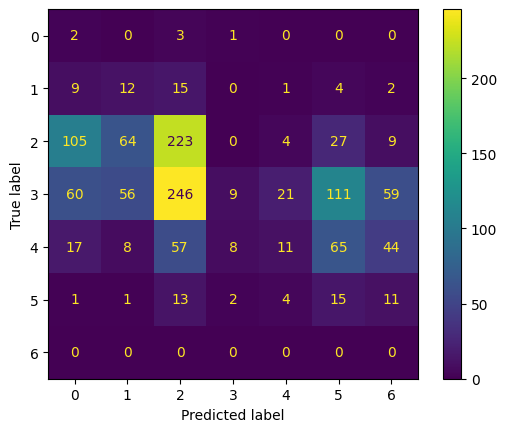

In [41]:
ConfusionMatrixDisplay(confusion_matrix(y_test_adj,y_pred)).plot()

Cuando ajustamos la profundidad a la que llega el modelo generaliza mejor con el test

Implementamos Voting para ver si podemos mejorar la predicción

In [84]:
voting_clf = VotingClassifier(
    estimators=[
        ('SVC', SVC(random_state=40, probability=True)),
        ('lr', LogisticRegression(random_state=40, class_weight='balanced', 
                             penalty= 'l1',
                              solver= 'saga' )),
        ('rfc', RandomForestClassifier(class_weight='balanced', 
                                random_state=40,
                                bootstrap=False,
                                max_depth=2,
                                min_samples_leaf=2,
                                min_samples_split=2,
                                n_estimators=100)),
        ('xgb', XGBClassifier(random_state=40)),
        ('cb', CatBoostClassifier(verbose=False, random_state=40))
    ],voting='soft'
)
voting_clf.fit(X_train_ets, y_train_adj)

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


VotingClassifier(estimators=[('SVC', SVC(probability=True, random_state=40)),
                             ('lr',
                              LogisticRegression(class_weight='balanced',
                                                 penalty='l1', random_state=40,
                                                 solver='saga')),
                             ('rfc',
                              RandomForestClassifier(bootstrap=False,
                                                     class_weight='balanced',
                                                     max_depth=2,
                                                     min_samples_leaf=2,
                                                     random_state=40)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=No...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=40, ...)),
                             ('cb',
                              <catboost.core.CatBoostClassifier object at 0x0000022C4F15A7D0>)],
                 voting='soft')

In [89]:
predd = voting_clf.predict(X_test_et)

In [130]:
voting_clf.score(X_train_ets, y_train_adj)

0.9587887925618797

In [91]:
print(f"Modelo Voting : {balanced_accuracy_score(y_test_adj, predd)}")
print(classification_report(y_test_adj, predd))

Modelo Voting : 0.5042220497058466
              precision    recall  f1-score   support

           0       0.08      0.17      0.11         6
           1       0.29      0.44      0.35        43
           2       0.71      0.69      0.70       432
           3       0.68      0.56      0.62       562
           4       0.52      0.63      0.57       210
           5       0.33      0.53      0.41        47
           6       0.00      0.00      0.00         0

    accuracy                           0.61      1300
   macro avg       0.37      0.43      0.39      1300
weighted avg       0.64      0.61      0.62      1300



c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification

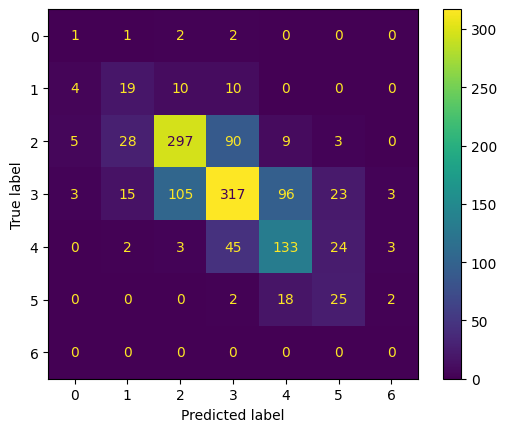

In [92]:
ConfusionMatrixDisplay(confusion_matrix(y_test_adj,predd)).plot()

Hacer voting con menos modelos no da mejores resultados, en la clase 0 no acierta ninguno de los valores, prueba abajo

In [74]:
voting_clf_2 = VotingClassifier(
    estimators=[
        ('rfc', RandomForestClassifier(class_weight='balanced', 
                                random_state=40,
                                bootstrap=False,
                                max_depth=2,
                                min_samples_leaf=2,
                                min_samples_split=2,
                                n_estimators=100)),
        ('xgb', XGBClassifier(random_state=40)),
        ('cb', CatBoostClassifier(verbose=False, random_state=40))
    ],voting='soft'
)
voting_clf_2.fit(X_train_ets, y_train_adj)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(bootstrap=False,
                                                     class_weight='balanced',
                                                     max_depth=2,
                                                     min_samples_leaf=2,
                                                     random_state=40)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_m...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=40, ...)),
                             ('cb',
                              <catboost.core.CatBoostClassifier object at 0x0000022C49EA0C50>)],
                 voting='soft')

In [129]:
voting_clf_2.score(X_train_ets, y_train_adj)

0.9872471416007036

In [77]:
predd_2 = voting_clf_2.predict(X_test_et)

In [79]:
print(f"Modelo Voting 2 : {balanced_accuracy_score(y_test_adj, predd_2)}")
print(classification_report(y_test_adj, predd_2))

Modelo Voting 2 : 0.47451770081010625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.34      0.35      0.34        43
           2       0.72      0.70      0.71       432
           3       0.67      0.62      0.65       562
           4       0.53      0.64      0.58       210
           5       0.50      0.53      0.52        47
           6       0.00      0.00      0.00         0

    accuracy                           0.64      1300
   macro avg       0.39      0.41      0.40      1300
weighted avg       0.64      0.64      0.64      1300



c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2399: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification

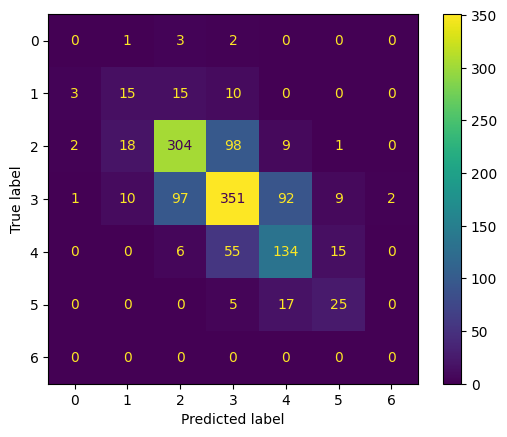

In [80]:
ConfusionMatrixDisplay(confusion_matrix(y_test_adj,predd_2)).plot()

## Modelo de regresión

In [99]:
X = df.drop(columns='alcohol', axis = 1)
y = df[['alcohol']]

In [100]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [101]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded = enc.fit_transform(X_train_2[['class']])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(['class']))

X_train_2.reset_index(inplace=True, drop=True)
X_train_2_encoded = pd.concat([X_train_2, encoded_df], axis=1)
X_train_2_encoded.drop(['class'], axis=1, inplace=True)

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [102]:
X_train_2_encoded.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,class_red,class_white
0,7.9,0.18,0.40,2.2,0.049,38.0,67.0,0.99600,3.33,0.93,5,1.0,0.0
1,7.1,0.18,0.74,15.6,0.044,44.0,176.0,0.99960,3.38,0.67,6,0.0,1.0
2,7.6,0.51,0.24,1.2,0.040,10.0,104.0,0.99200,3.05,0.29,6,0.0,1.0
3,6.0,0.25,0.28,7.7,0.053,37.0,132.0,0.99489,3.06,0.50,6,0.0,1.0
4,9.0,0.38,0.41,2.4,0.103,6.0,10.0,0.99604,3.13,0.58,7,1.0,0.0


In [103]:
encoded = enc.transform(X_test_2[['class']])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(['class']))

X_test_2.reset_index(inplace=True, drop=True)
X_test_2_encoded = pd.concat([X_test_2, encoded_df], axis=1)
X_test_2_encoded.drop(['class'], axis=1, inplace=True)

In [104]:
X_test_2_encoded.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,class_red,class_white
0,7.4,0.32,0.27,1.4,0.049,38.0,173.0,0.99335,3.03,0.52,5,0.0,1.0
1,6.6,0.34,0.24,3.3,0.034,29.0,99.0,0.99031,3.10,0.40,7,0.0,1.0
2,6.4,0.32,0.35,4.8,0.030,34.0,101.0,0.99120,3.36,0.60,8,0.0,1.0
3,6.8,0.23,0.32,1.6,0.026,43.0,147.0,0.99040,3.29,0.54,6,0.0,1.0
4,6.7,0.34,0.26,1.9,0.038,58.0,138.0,0.98930,3.00,0.47,7,0.0,1.0


In [105]:
sc = StandardScaler()

X_train_2_encoded_t = X_train_2_encoded[['fixed acidity', 'residual sugar', 'free sulfur dioxide','quality', 'total sulfur dioxide','pH']]
train_t_array = sc.fit_transform(X_train_2_encoded_t)
train_2_t = pd.DataFrame(train_t_array, columns=X_train_2_encoded_t.columns)

train_resto_2 = X_train_2_encoded.drop(columns=['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'quality', 'pH'], axis = 1)

X_train_2_et = pd.concat([train_2_t, train_resto_2], axis=1)

X_train_2_et

,fixed acidity,residual sugar,free sulfur dioxide,quality,total sulfur dioxide,pH,volatile acidity,citric acid,chlorides,density,sulphates,class_red,class_white
0,0.530566,-0.682946,0.413075,-0.939103,-0.855503,0.692811,0.18,0.40,0.049,0.99600,0.93,1.0,0.0
1,-0.087744,2.118572,0.746349,0.209525,1.063516,1.005292,0.18,0.74,0.044,0.99960,0.67,0.0,1.0
2,0.298700,-0.892015,-1.142201,0.209525,-0.204093,-1.057086,0.51,0.24,0.040,0.99200,0.29,0.0,1.0
3,-0.937920,0.466930,0.357530,0.209525,0.288866,-0.994590,0.25,0.28,0.053,0.99489,0.50,0.0,1.0
4,1.380743,-0.641133,-1.364383,1.358153,-1.859027,-0.557116,0.38,0.41,0.103,0.99604,0.58,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,-0.628765,1.282298,1.635078,-0.939103,1.679715,-0.244634,0.24,0.50,0.047,0.99660,0.57,0.0,1.0
5193,-0.474187,1.376378,-0.309017,-0.939103,0.165626,1.442767,0.22,0.28,0.058,0.99856,0.45,0.0,1.0
5194,-0.474187,0.508744,-0.031289,1.358153,0.517740,0.630314,0.20,0.38,0.052,0.99470,0.56,0.0,1.0
5195,0.066834,-0.766574,-0.253471,2.506780,-0.732264,-1.619553,0.41,0.29,0.032,0.98889,0.35,0.0,1.0


In [106]:
X_test_2_encoded_t = X_test_2_encoded[['fixed acidity', 'residual sugar', 'free sulfur dioxide','quality', 'total sulfur dioxide','pH']]
test_t_array = sc.fit_transform(X_test_2_encoded_t)
test_2_t = pd.DataFrame(test_t_array, columns=X_test_2_encoded_t.columns)

test_resto_2 = X_test_2_encoded.drop(columns=['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'quality', 'pH'], axis = 1)

X_test_2_et = pd.concat([test_2_t, test_resto_2], axis=1)

X_test_2_et

,fixed acidity,residual sugar,free sulfur dioxide,quality,total sulfur dioxide,pH,volatile acidity,citric acid,chlorides,density,sulphates,class_red,class_white
0,0.135950,-0.849016,0.457007,-0.929935,1.023064,-1.135291,0.320,0.27,0.049,0.99335,0.52,0.0,1.0
1,-0.476516,-0.440605,-0.082302,1.333952,-0.313394,-0.707872,0.340,0.24,0.034,0.99031,0.40,0.0,1.0
2,-0.629633,-0.118175,0.217314,2.465896,-0.277273,0.879685,0.320,0.35,0.030,0.99120,0.60,0.0,1.0
3,-0.323400,-0.806025,0.756623,0.202008,0.553498,0.452266,0.230,0.32,0.026,0.99040,0.54,0.0,1.0
4,-0.399958,-0.741539,1.655472,1.333952,0.390956,-1.318470,0.340,0.26,0.038,0.98930,0.47,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0.289066,1.988367,0.097467,-0.929935,1.528750,-1.318470,0.285,0.32,0.063,0.99800,0.45,0.0,1.0
1296,3.351396,-0.806025,0.337160,-2.061879,-1.180285,1.001804,0.470,0.44,0.147,0.99836,0.86,1.0,0.0
1297,2.279581,-0.698549,-1.520460,1.333952,-1.938815,-0.097273,0.340,0.48,0.052,0.99458,0.69,1.0,0.0
1298,-0.782749,-0.806025,-1.400613,-0.929935,-1.902695,2.406181,0.460,0.17,0.073,0.99425,0.54,1.0,0.0


Probe escalando la target pero medio mejor resultado sin escalarla

In [88]:
# sc_2 = StandardScaler()

# y_train_2_array = sc_2.fit_transform(y_train_2)

# y_train_2_e = pd.DataFrame(y_train_2_array, columns=y_train_2.columns)


In [89]:
# y_train_2_e.head()

,alcohol
0,0.678033
1,-1.248291
2,0.259267
3,-0.913278
4,1.180553


## Modelos

In [107]:
model_0 = SVR()
model_1 = LinearRegression()
model_2 = Ridge()
model_3 = Lasso()
model_4 = ElasticNet()
model_5 = RandomForestRegressor()

In [108]:
models = [model_0, model_1, model_2, model_3, model_4, model_5]

In [109]:
dicc = {}
for i in models:
    scores = -cross_val_score(i, X_train_2_et, y_train_2, cv=10, scoring='neg_mean_absolute_percentage_error')
    media = scores.mean()
    estandar = scores.std()
    clave = f"{i}- 'neg_mean_absolute_percentage_error' "

    dicc[clave] = media

df_scores = pd.DataFrame([dicc]).T.sort_values(by=0, ascending=False)
df_scores

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataC

,0
Lasso()- 'neg_mean_absolute_percentage_error',0.094802
ElasticNet()- 'neg_mean_absolute_percentage_error',0.093922
Ridge()- 'neg_mean_absolute_percentage_error',0.067541
SVR()- 'neg_mean_absolute_percentage_error',0.057780
LinearRegression()- 'neg_mean_absolute_percentage_error',0.033700
RandomForestRegressor()- 'neg_mean_absolute_percentage_error',0.025778


In [110]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(model_5,
                           param_grid,
                           cv=5,
                           scoring='neg_mean_absolute_percentage_error',
                           n_jobs=-1
                          )

grid_search.fit(X_train_2_et, y_train_2)

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
309 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_absolute_percentage_error')

In [111]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [112]:
modelo_2 = RandomForestRegressor(
    bootstrap=False,
    max_depth=10,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100)

In [113]:
modelo_2.fit(X_train_2_et, y_train_2)

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(bootstrap=False, max_depth=10, max_features='log2')

In [114]:
predicc = modelo_2.predict(X_test_2_et)

In [115]:
mean_absolute_percentage_error(y_test_2, predicc)

0.03706473858065267

In [121]:
voting_reg = VotingRegressor(
    estimators=[
        ('SVR', SVR()),
        ('lr', LinearRegression()),
        ('rfr', RandomForestRegressor(
                                    bootstrap=False,
                                    max_depth=10,
                                    max_features='log2',
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    n_estimators=100, 
                                    random_state= 40)),
        ('rg', Ridge(random_state=40)),
        ('el' , ElasticNet())
    ]
)
voting_reg.fit(X_train_2_et, y_train_2)

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_voting.py:604: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('SVR', SVR()), ('lr', LinearRegression()),
                            ('rfr',
                             RandomForestRegressor(bootstrap=False,
                                                   max_depth=10,
                                                   max_features='log2',
                                                   random_state=40)),
                            ('rg', Ridge(random_state=40)),
                            ('el', ElasticNet())])

In [126]:
voting_reg.score(X_train_2_et, y_train_2)

0.7122688220486524

In [127]:
predd_r = voting_reg.predict(X_test_2_et)

In [128]:
mean_absolute_percentage_error(y_test_2, predd_r)

0.051194748971644756

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros. El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora.

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara los modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros. Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

## Conclusiones

#### Modelo 1 - Clasificación 
Aunque se balancean las clases igual sigue dando error a la hora de predecir dos de las clases, lo que se podría implementar es un voting para poder minimizar el error a la hora de predecir estas clases. 

#### Modelo 2 - Regresión 
El porcentaje de error que tiene es muy bajo por el modelo que estamos usando. 